In [28]:
! pip install opencv-python

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

In [59]:
model=keras.models.load_model(r"C:\Users\Bhagyashree\Downloads\face_mask_model.h5")
#load Cascade
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [92]:
# Read input Image
image=cv2.imread(r"C:\Users\Bhagyashree\Downloads\vicky-kaushal.jpg")

In [93]:
#Convert into greyscale
grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [94]:
faces=face_cascade.detectMultiScale(grey,1.1,4)

<function matplotlib.pyplot.show(close=None, block=None)>

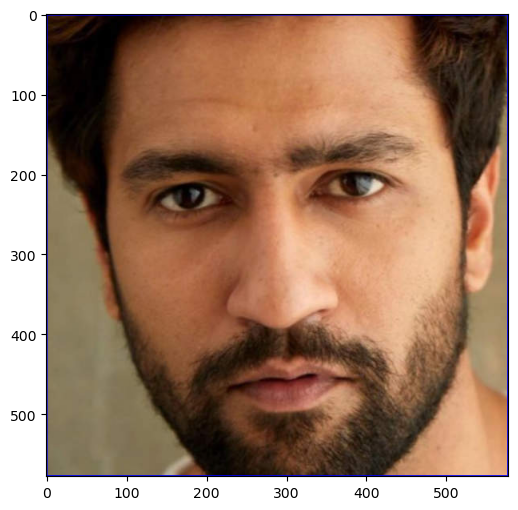

In [95]:
#Draw rectangle
for (x,y,w,h) in faces:
    cv2.rectangle(
    image,
    (x,y),
    (x+w,y+h),
    (255,0,0),
    2
)
image = image[y:y + h, x:x + w]

        
rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(rgb_image)
plt.show

TypeError: only integer scalar arrays can be converted to a scalar index

In [96]:
image=cv2.resize(image,(150,150))
image=image.reshape(1,150,150,3)
predictions=model.predict(image)
for x in predictions:
    ans = ['with_mask' if np.argmax(x) == 0 else 'without_mask']
    print(ans)


1/1 [==============================] - 0s 50ms/step
['with_mask']


In [37]:
cap = cv2.VideoCapture(0)

while True:
    
    # Read the frame
    _, img = cap.read()
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
    # Display
    cv2.imshow('img', img)
    
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
        
# Release the VideoCapture object and destroyAllWindows
cap.release()
cv2.destroyAllWindows()